<a href="https://colab.research.google.com/github/daniellemosborne/plantpal-web/blob/main/garden_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Plant Classification Model**

This model trains from a dataset consisting of 30 types of plant images, including 21,000 training images, 3,000 validation images and 6,000 test images. The following plants are recognized: aloevera, banana, bilimbi, cantaloupe, cassava, coconut, corn, cucumber, curcuma, eggplant, galangal, ginger, guava, kale, longbeans, mango, melon, orange, paddy, papaya, peperchili, pineapple, pomelo, shallot, soybeans, spinach, sweetpotatoes, tobacco, waterapple, and watermelon.

**The goal of this model is to help identify common plants found in your garden.**

In [ ]:
from tensorflow import keras

model_plantbase = keras.applications.ResNet50(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)

In [ ]:
model_plantbase.trainable = False

In [ ]:
inputs_plant = keras.Input(shape=(224, 224, 3)) # input layer for 224x224 RGB images
x_plant = model_plantbase(inputs_plant, training=False) # using base model for feature extraction
x_plant = keras.layers.GlobalAveragePooling2D()(x_plant) # reduce feature map to 1d per channel
x_plant = keras.layers.Dense(512, activation='relu')(x_plant) # using fully connected layer
outputs_plant = keras.layers.Dense(30)(x_plant) # 30 different plants
model_plant = keras.Model(inputs_plant, outputs_plant) # build the model

In [ ]:
model_plant.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_23 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_11     │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 30)             │        15,390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,652,190 (94.04 MB)

 Trainable params: 1,064,478 (4.06 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

## **Compiling the Model**

We need to compile the model with loss and metrics options. We have to make some different choices here. In this case, we have many categories of plants in our classification problem, therefore, we will choose categorical cross-entropy for the calculation of loss.

By setting from_logits=True we inform the loss function that the output values are not normalized (e.g. with softmax).

In [ ]:
model_plant.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[keras.metrics.CategoricalAccuracy()])

## **Augmenting the Data**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create a data generator
plant_train_datagen = ImageDataGenerator(
    samplewise_center=True, # set each sample mean to 0
    rotation_range=15, # randomly rotate in the range 0 to 180 degrees
    zoom_range = 0.1, # randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True, # can be vertically flipped
    shear_range=0.1, # added shear transformation
    brightness_range=[0.7, 1.3] # added brightness variation
)

plant_valid_datagen = ImageDataGenerator(
    samplewise_center=True,
    rotation_range=15,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.1, # added shear transformation
    brightness_range=[0.7, 1.3] # added brightness variation
)

## **Loading the Data**

We are going to load images directly from folders using Keras' flow_from_directory function. We have set up our directories to help this process go smoothly as our labels are inferred from the folder names. In the datasets directory, we have train and validation directories, which each have folders for images of 30 different plant types.

Note that flow_from_directory will also allow us to size our images to match the model: 244x244 pixels with 3 channels.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/plants.zip' -d /content/data

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/train/tobacco/tobacco190.jpg  
  inflating: /content/data/train/tobacco/tobacco191.jpg  
  inflating: /content/data/train/tobacco/tobacco192.jpg  
  inflating: /content/data/train/tobacco/tobacco193.jpg  
  inflating: /content/data/train/tobacco/tobacco194.jpg  
  inflating: /content/data/train/tobacco/tobacco195.jpg  
  inflating: /content/data/train/tobacco/tobacco196.jpg  
  inflating: /content/data/train/tobacco/tobacco197.jpg  
  inflating: /content/data/train/tobacco/tobacco198.jpg  
  inflating: /content/data/train/tobacco/tobacco199.jpg  
  inflating: /content/data/train/tobacco/tobacco2.jpg  
  inflating: /content/data/train/tobacco/tobacco20.jpg  
  inflating: /content/data/train/tobacco/tobacco200.jpg  
  inflating: /content/data/train/tobacco/tobacco201.jpg  
  inflating: /content/data/train/tobacco/tobacco202.jpg  
  inflating: /content/data/train/tobacco/tobacco203.jpg  
  inflating: /content/da

In [ ]:
# load and iterate training dataset for plants
train_plants = plant_train_datagen.flow_from_directory('/content/data/train',
                                       target_size=(224, 224),
                                       color_mode='rgb',
                                       class_mode='categorical',
                                       batch_size=32)

# load and iterate validation dataset for plants
valid_plants = plant_valid_datagen.flow_from_directory('/content/data/val',
                                      target_size=(224, 224),
                                      color_mode='rgb',
                                      class_mode='categorical',
                                      batch_size=32)

Found 21000 images belonging to 30 classes.
Found 3000 images belonging to 30 classes.


## **Training the Model**

In [ ]:
# train plant model
model_plant.fit(train_plants, steps_per_epoch=24, validation_data=valid_plants, validation_steps=8, epochs=20)

Epoch 1/20


## **Fine-Tuning the Model**

Now that the new layers of the model are trained, we have the option to apply a final trick to improve the model, called fine-tuning. To do this we unfreeze the entire model, and train it again with a very small learning rate. This will cause the base pre-trained layers to take very small steps and adjust slightly, improving the model by a small amount.

It is important to only do this step after the model with frozen layers has been fully trained. The untrained pooling and classification layers that we added to the model earlier were randomly initialized. This means they needed to be updated quite a lot to correctly classify the images. Through the process of backpropagation, large initial updates in the last layers would have caused potentially large updates in the pre-trained layers as well. These updates would have destroyed those important pre-trained features. However, now that those final layers are trained and have converged, any updates to the model as a whole will be much smaller (especially with a very small learning rate) and will not destroy the features of the earlier layers.

Below I will unfreeze the pre-trained layers, and then fine tune the model:

In [ ]:
# Unfreeze the base model
model_plantbase.trainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are taken into account
model_plant.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00002), #changed from .00001
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              #loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.CategoricalAccuracy()])
              #metrics=[keras.metrics.BinaryAccuracy()])

In [ ]:
plant_accuracies = []

history_plants = model_plant.fit(train_plants, steps_per_epoch=24, validation_data=valid_plants, validation_steps=8, epochs=20)
plant_accuracies.append(history_plants.history['categorical_accuracy'])

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 61s 946ms/step - categorical_accuracy: 0.6033 - loss: 1.3568 - val_categorical_accuracy: 0.7773 - val_loss: 0.7203
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 756ms/step - categorical_accuracy: 0.6940 - loss: 0.9884 - val_categorical_accuracy: 0.7891 - val_loss: 0.7631
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 803ms/step - categorical_accuracy: 0.6839 - loss: 1.0600 - val_categorical_accuracy: 0.7656 - val_loss: 0.7245
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 691ms/step - categorical_accuracy: 0.7320 - loss: 0.8501 - val_categorical_accuracy: 0.7930 - val_loss: 0.6476
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 672ms/step - categorical_accuracy: 0.6980 - loss: 1.0369 - val_categorical_accuracy: 0.8086 - val_loss: 0.6996
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 840ms/step - categorical_accuracy: 0.7872 - loss: 0.7948 - val_categorical_accuracy: 0.8086 - val_loss: 0.7257
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 805ms/step - categorical_accuracy: 0.744

## **Evaluating the Model**

In [ ]:
# Evaluate the model
loss, accuracy = model_plant.evaluate(valid_plants)
print(f'Validation accuracy: {accuracy * 100:.2f}%')

94/94 ━━━━━━━━━━━━━━━━━━━━ 48s 513ms/step - categorical_accuracy: 0.8317 - loss: 0.5124
Validation accuracy: 83.47%


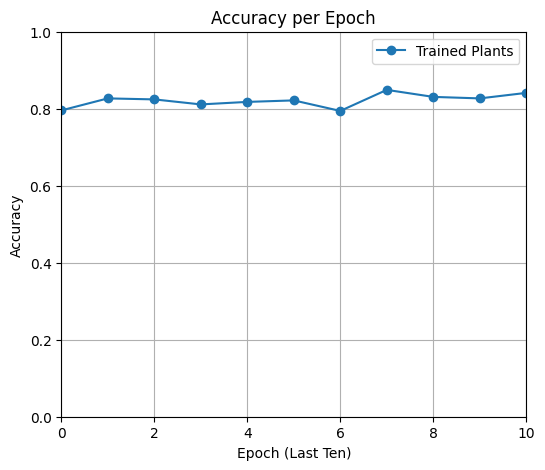

In [ ]:
import matplotlib.pyplot as plt

# Extract the accuracy values per epoch
accuracy_plants = history_plants.history['categorical_accuracy'][0:11]

# Create the line graph
plt.figure(figsize=(6, 5))
plt.plot(range(0, 11), accuracy_plants, label='Trained Plants', marker='o')
plt.xlabel('Epoch (Last Ten)')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()
plt.ylim(0,1)
plt.xlim(0,10)
plt.grid(True)
plt.show()

In [ ]:
average_accuracy_plants = sum(accuracy_plants) / len(accuracy_plants)
print(f'Average accuracy per epoch for Plants: {average_accuracy_plants * 100:.2f}%')

Average accuracy per epoch for Plants: 82.17%


## **Examining the Predictions**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
# Import the correct preprocess_input for ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    # Use the correct preprocess_input for ResNet50
    image = preprocess_input(image)
    preds = model_plant.predict(image)
    return preds

**Now we must test if the predictions are correct**

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
The predicted class is: aloevera


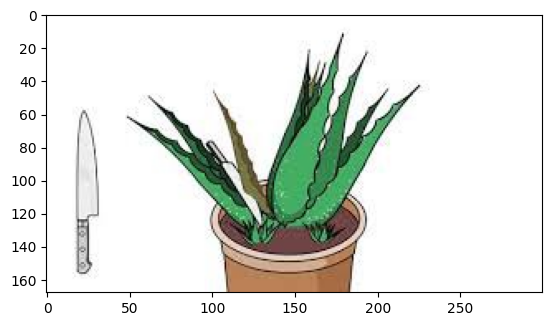

In [ ]:
import numpy as np

# Get the index of the highest probability
predicted_class_index = np.argmax(make_predictions('/content/data/test/aloevera/aloevera800.jpg'))

# handles plants classes
class_labels = train_plants.class_indices
predicted_class_label = [k for k, v in class_labels.items() if v == predicted_class_index][0]

print(f'The predicted class is: {predicted_class_label}')